# Load Libraries

In [2]:
import numpy as np
import pandas as pd
import pickle
import nltk
import re
import string
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # for lemmatize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\youse\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Load Data

In [5]:
df = pd.read_csv("train.txt", header=None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")
df['length'] = [len(x) for x in df['Comment']]

In [6]:
df.head()

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [7]:
df.tail()

,Comment,Emotion,length
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59
15999,i know a lot but i feel so stupid because i ca...,sadness,62


In [8]:
df.shape

(16000, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  16000 non-null  object
 1   Emotion  16000 non-null  object
 2   length   16000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [10]:
df.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True , ignore_index=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [16]:
df['length'].describe()

count    15999.000000
mean        96.847990
std         55.906021
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: length, dtype: float64

 # Exploratory Data Analysis (ُEDA)

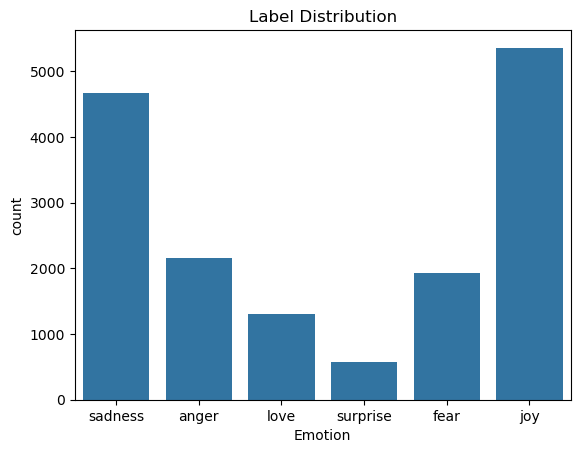

In [30]:
sns.countplot(x = df['Emotion'])
plt.title("Label Distribution")
plt.show() 

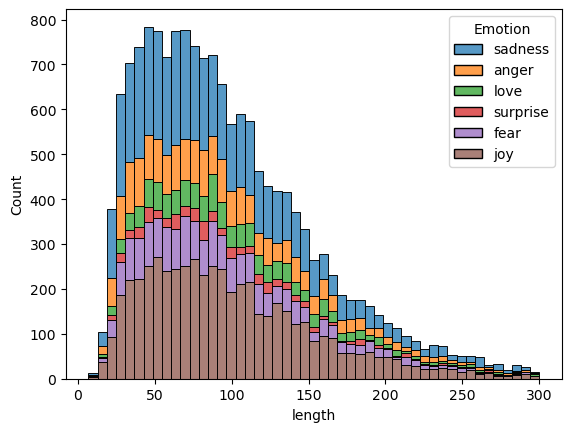

In [32]:
sns.histplot(data=df, x='length', hue='Emotion', multiple='stack')
plt.show()

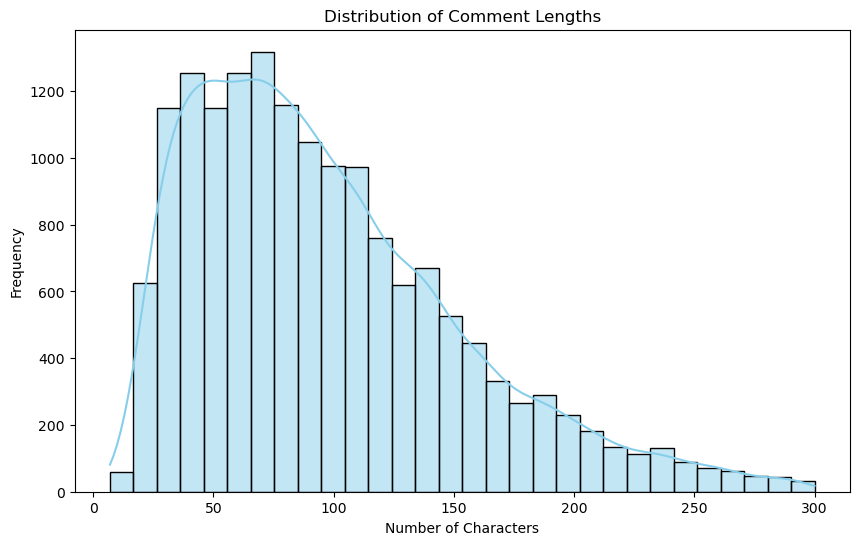

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

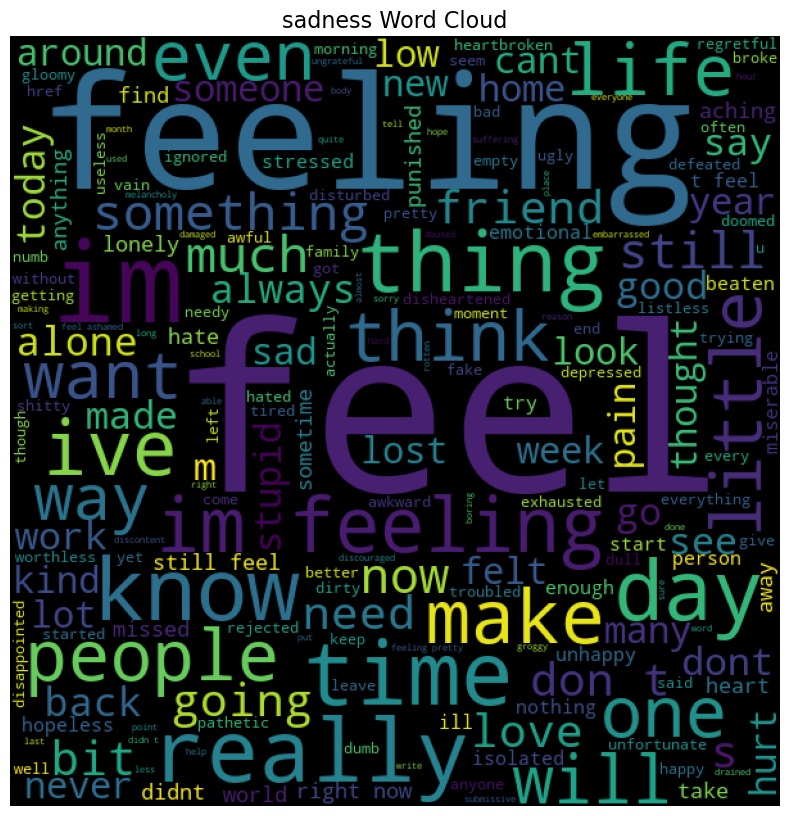

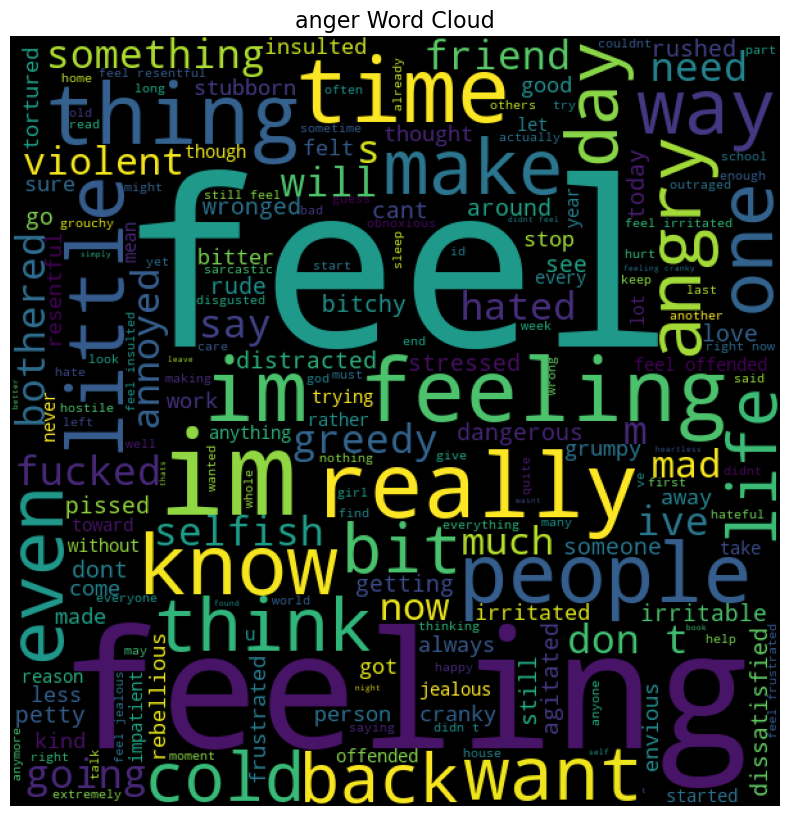

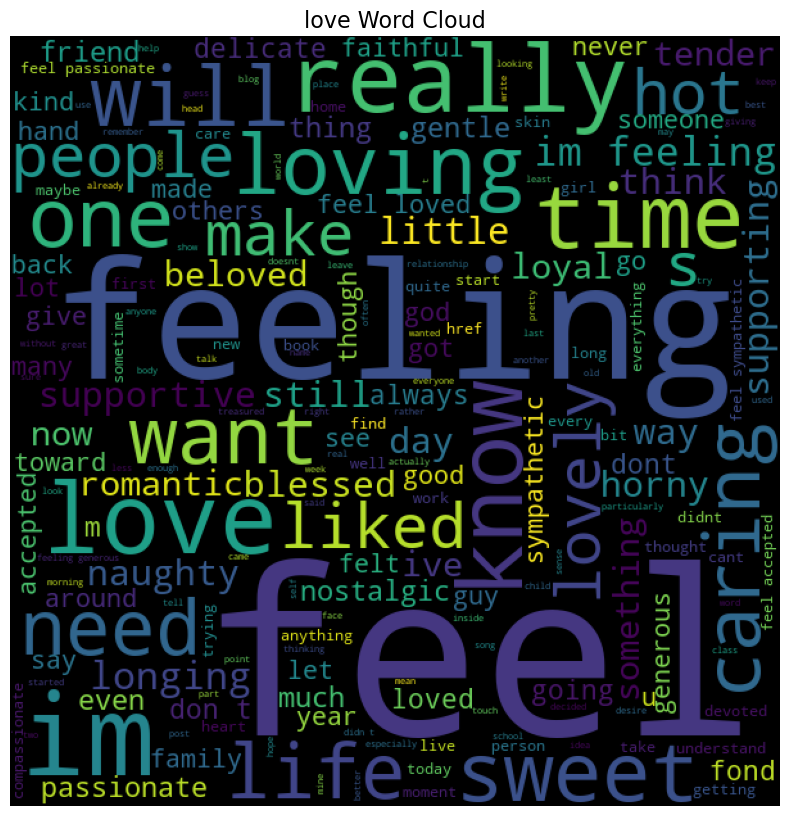

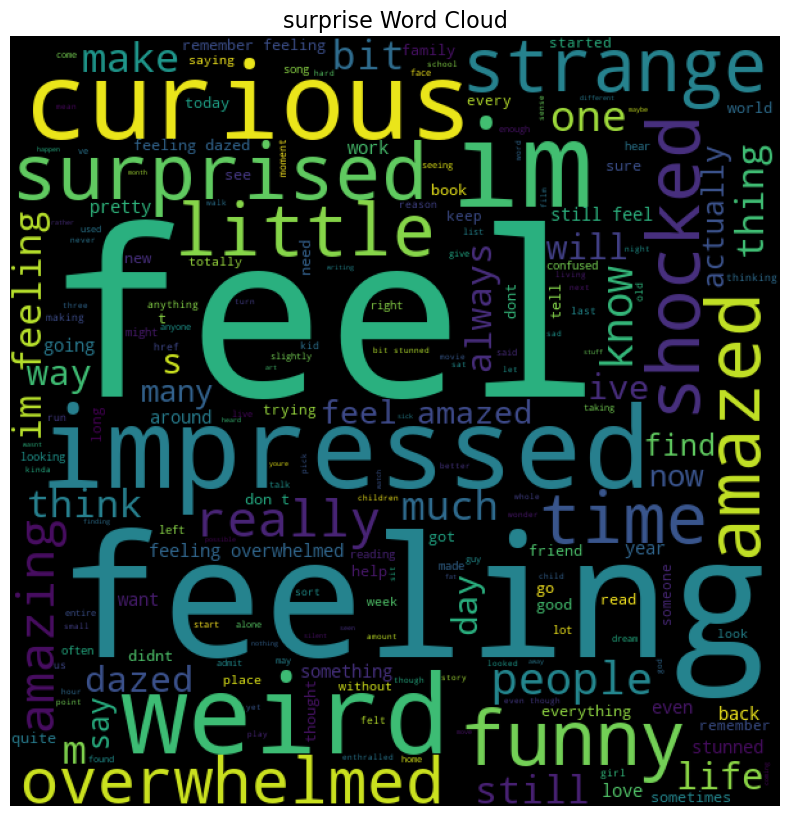

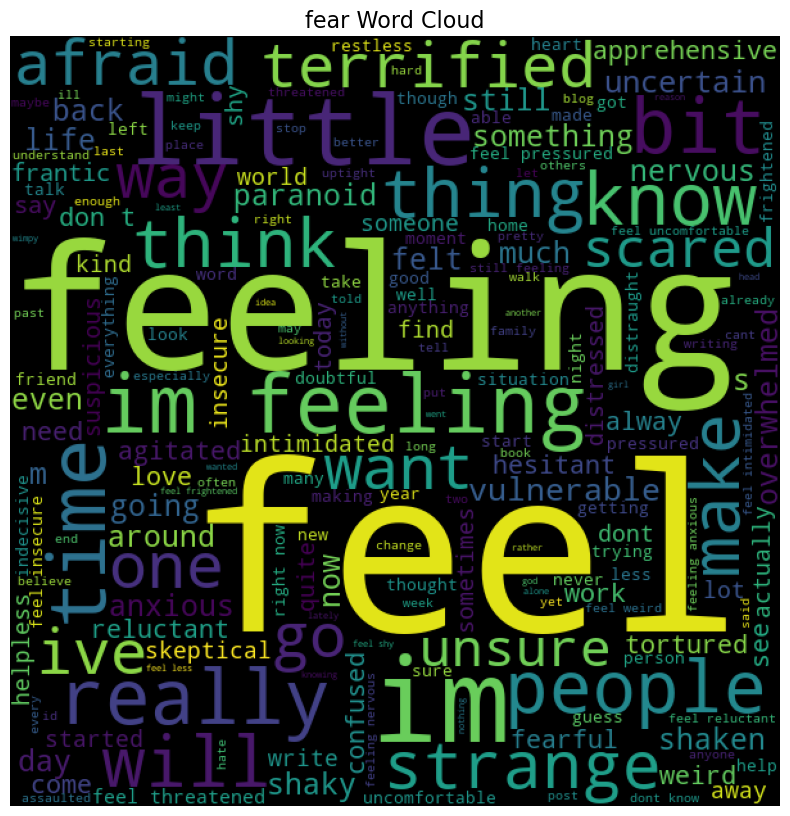

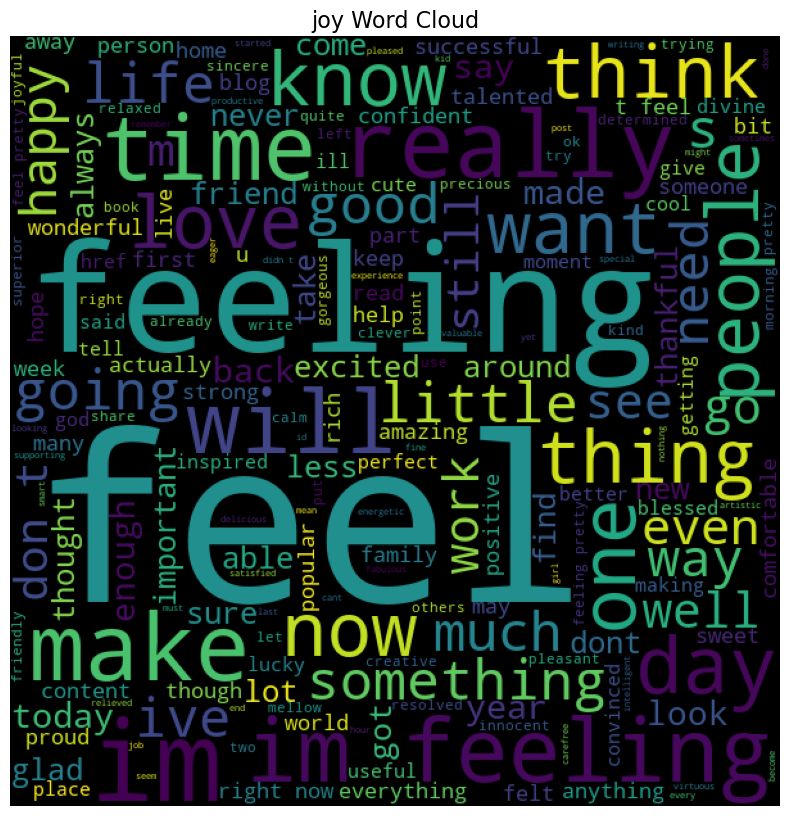

In [34]:
# Words cloud for each emotions
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    plt.axis("off");
emotions_list = df['Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in df.loc[df['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

# Data Preprocessing
# Encode Emotions

In [37]:
lb = LabelEncoder()
df['Emotion'] = lb.fit_transform(df['Emotion'])

In [39]:
df

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20
...,...,...,...
15994,i just had a very brief time in the beanbag an...,4,101
15995,i am now turning and i feel pathetic that i am...,4,102
15996,i feel strong and good overall,2,30
15997,i feel like this was such a rude comment and i...,0,59


In [40]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Cleaning function
def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)  
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text) 
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply to DataFrame
df['cleaned_comment'] = df['Comment'].astype(str).apply(clean_text)

In [41]:
df

,Comment,Emotion,length,cleaned_comment
0,i didnt feel humiliated,4,23,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,4,108,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,0,48,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,3,92,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,0,20,feeling grouchy
...,...,...,...,...
15994,i just had a very brief time in the beanbag an...,4,101,brief time beanbag said anna feel like beaten
15995,i am now turning and i feel pathetic that i am...,4,102,turning feel pathetic still waiting table subb...
15996,i feel strong and good overall,2,30,feel strong good overall
15997,i feel like this was such a rude comment and i...,0,59,feel like rude comment im glad


# Applying Machine Learning

In [43]:
# ML packages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
df2 = df.copy() # to use in deep learning

In [45]:
df2

,Comment,Emotion,length,cleaned_comment
0,i didnt feel humiliated,4,23,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,4,108,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,0,48,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,3,92,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,0,20,feeling grouchy
...,...,...,...,...
15994,i just had a very brief time in the beanbag an...,4,101,brief time beanbag said anna feel like beaten
15995,i am now turning and i feel pathetic that i am...,4,102,turning feel pathetic still waiting table subb...
15996,i feel strong and good overall,2,30,feel strong good overall
15997,i feel like this was such a rude comment and i...,0,59,feel like rude comment im glad


In [46]:
X = df['cleaned_comment']
y = df['Emotion']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,           
    ngram_range=(1, 3),          
    stop_words='english',        
    lowercase=True,              
    strip_accents='unicode',      
    sublinear_tf=True            
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Models Evaluation

In [50]:
# Train each model
nb = MultinomialNB(alpha=1.0)
nb.fit(X_train_tfidf, y_train)

lg = LogisticRegression(C=0.5, max_iter=1000)
lg.fit(X_train_tfidf, y_train)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
rf.fit(X_train_tfidf, y_train)


svm = SVC(kernel='linear', C=0.5 , probability=True)
svm.fit(X_train_tfidf, y_train)

SVC(C=0.5, kernel='linear', probability=True)


===== Multinomial Naive Bayes =====
Train Accuracy: 0.8665
Test Accuracy:  0.7922

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.67      0.79       439
           1       0.88      0.67      0.76       375
           2       0.71      0.97      0.82      1027
           3       0.99      0.24      0.39       303
           4       0.82      0.95      0.88       950
           5       1.00      0.15      0.26       106

    accuracy                           0.79      3200
   macro avg       0.89      0.61      0.65      3200
weighted avg       0.83      0.79      0.77      3200



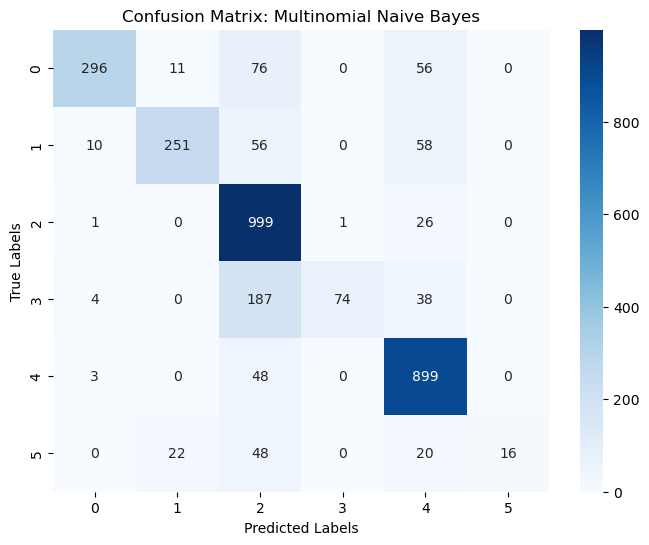


===== Logistic Regression =====
Train Accuracy: 0.9489
Test Accuracy:  0.8809

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       439
           1       0.87      0.80      0.84       375
           2       0.84      0.97      0.90      1027
           3       0.94      0.64      0.76       303
           4       0.91      0.96      0.93       950
           5       0.89      0.51      0.65       106

    accuracy                           0.88      3200
   macro avg       0.89      0.79      0.83      3200
weighted avg       0.88      0.88      0.88      3200



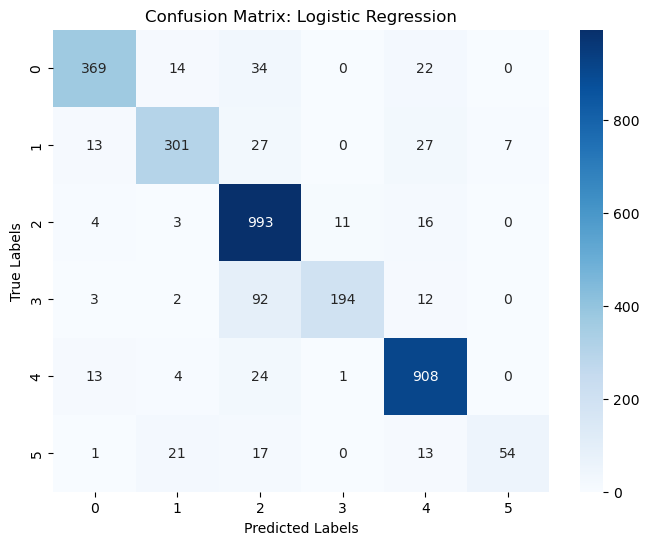


===== Random Forest =====
Train Accuracy: 0.9969
Test Accuracy:  0.8859

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       439
           1       0.83      0.89      0.86       375
           2       0.89      0.91      0.90      1027
           3       0.86      0.76      0.81       303
           4       0.92      0.92      0.92       950
           5       0.79      0.76      0.78       106

    accuracy                           0.89      3200
   macro avg       0.86      0.85      0.86      3200
weighted avg       0.89      0.89      0.89      3200



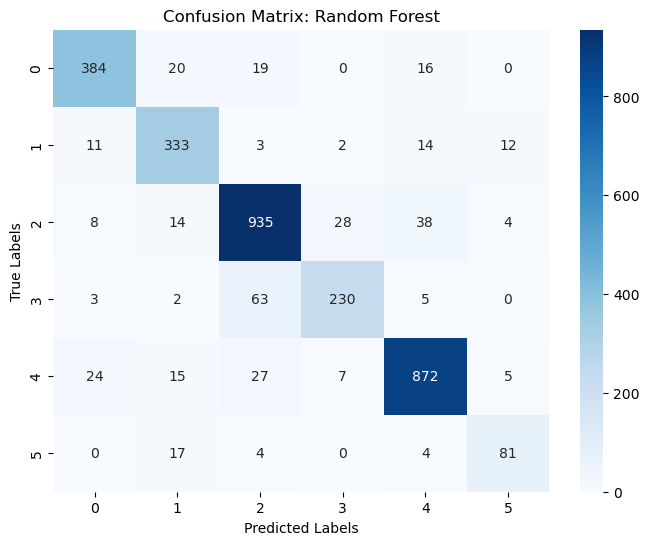


===== Support Vector Machine =====
Train Accuracy: 0.9888
Test Accuracy:  0.8838

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       439
           1       0.88      0.82      0.85       375
           2       0.83      0.97      0.89      1027
           3       0.94      0.62      0.74       303
           4       0.92      0.95      0.93       950
           5       0.94      0.60      0.74       106

    accuracy                           0.88      3200
   macro avg       0.91      0.80      0.84      3200
weighted avg       0.89      0.88      0.88      3200



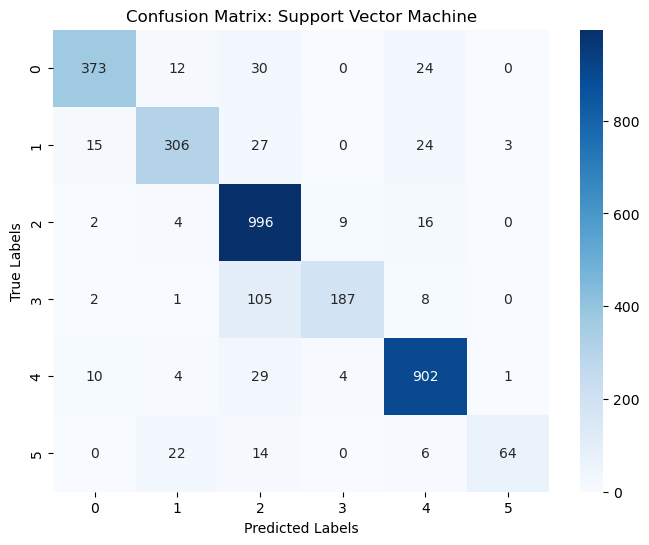

In [54]:
# Define classifiers
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Loop over classifiers
for name, clf in classifiers.items():
    print(f"\n===== {name} =====")
    
    # Fit model
    clf.fit(X_train_tfidf, y_train)
    
    # Predictions
    y_train_pred = clf.predict(X_train_tfidf)
    y_test_pred  = clf.predict(X_test_tfidf)
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    
    # Classification Report (on Test Set)
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion Matrix (on Test Set)
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Predictive System (Machine Learning)

In [69]:
def predict_emotion(input_text, model):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict emotion
    predicted_label = model.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(predicted_label)

    return predicted_emotion, label

models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}


for name, clf in models.items():
    clf.fit(X_train_tfidf, y_train)
    
# Example usage 
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]

selected_model = models["Logistic Regression"]  

for sentence in sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence, selected_model)
    print("Prediction:", pred_emotion)
    print("Label:", label)
    print("================================================================")

i didnt feel humiliated
Prediction: sadness
Label: 4
i feel strong and good overall
Prediction: joy
Label: 2
im grabbing a minute to post i feel greedy wrong
Prediction: anger
Label: 0
He was speechles when he found out he was accepted to this new job
Prediction: joy
Label: 2
This is outrageous, how can you talk like that?
Prediction: joy
Label: 2
I feel like im all alone in this world
Prediction: sadness
Label: 4
He is really sweet and caring
Prediction: love
Label: 3
You made me very crazy
Prediction: sadness
Label: 4
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Prediction: love
Label: 3
i am feeling grouchy
Prediction: anger
Label: 0
He hates you
Prediction: sadness
Label: 4


# Save Models and Files

In [83]:
import pickle

# Save all models
pickle.dump(nb, open("multinomial_nb.pkl", 'wb'))
pickle.dump(lg, open("logistic_regression.pkl", 'wb'))
pickle.dump(rf, open("random_forest.pkl", 'wb'))
pickle.dump(svm, open("svm_model.pkl", 'wb'))

# Save TF-IDF vectorizer
pickle.dump(tfidf_vectorizer, open("tfidf_vectorizer.pkl", 'wb'))

# Save label encoder
pickle.dump(lb, open("label_encoder.pkl", 'wb'))

In [71]:
%%writefile NLP.py
import streamlit as st
import pickle
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn
import nltk

# Load models
models = {
    "Logistic Regression": pickle.load(open("logistic_regression.pkl", 'rb')),
    "Multinomial Naive Bayes": pickle.load(open("multinomial_nb.pkl", 'rb')),
    "Random Forest": pickle.load(open("random_forest.pkl", 'rb')),
    
}

# Load shared assets
tfidf_vectorizer = pickle.load(open("tfidf_vectorizer.pkl", 'rb'))
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))
emotion_labels = list(label_encoder.classes_)

# Model Accuracy (assumed values)
model_accuracies = {
    "Logistic Regression": 0.85,
    "Multinomial Naive Bayes": 0.83,
    "Random Forest": 0.80
    
}

# Evaluation results (example summaries)
model_evaluations = {
    "Logistic Regression": """
**Precision**: 0.86  
**Recall**: 0.85  
**F1-score**: 0.85  
**Support**: 1000 samples  
""",
    "Multinomial Naive Bayes": """
**Precision**: 0.82  
**Recall**: 0.83  
**F1-score**: 0.82  
**Support**: 1000 samples  
""",
    "Random Forest": """
**Precision**: 0.81  
**Recall**: 0.80  
**F1-score**: 0.80  
**Support**: 1000 samples  

"""
}

# App Config
st.set_page_config(page_title="Emotion Classifier (ML)", layout="centered")

# App Header
st.markdown("""
    <div style="text-align:center;">
        <h1 style="color:#6C63FF;">🤖 ML Emotion Classifier</h1>
        <p style="color:gray; font-size:18px;">Compare multiple ML models for emotion detection.</p>
    </div>
""", unsafe_allow_html=True)

# Sidebar - Model selection and info
with st.sidebar:
    st.header("📊 Model Info")
    model_choice = st.selectbox("Choose a model:", list(models.keys()))
    model_accuracy = model_accuracies[model_choice]
    st.progress(int(model_accuracy * 100), text=f"Accuracy: {model_accuracy * 100:.1f}%")
    st.markdown(model_evaluations[model_choice])

# Input Section
st.subheader("📝 Enter your sentence:")
text_input = st.text_area("Type something emotional...", placeholder="e.g. I'm so happy today!")

# Predict Button
if st.button("🔍 Predict Emotion"):
    if not text_input.strip():
        st.warning("Please enter a sentence.")
    else:
        st.subheader("📈 Prediction Results")

        # Vectorize and predict
        X_input = tfidf_vectorizer.transform([text_input])
        model = models[model_choice]
        pred_probs = model.predict_proba(X_input)[0]
        pred_label = np.argmax(pred_probs)
        emotion = label_encoder.inverse_transform([pred_label])[0]

        # Show prediction
        st.success(f"🎯 Predicted Emotion: **{emotion}**")

        # Plot probability chart
        prob_df = pd.DataFrame({
            'Emotion': emotion_labels,
            'Probability': pred_probs
        }).sort_values(by='Probability', ascending=False)

        fig = px.bar(prob_df, x='Emotion', y='Probability', color='Emotion',
                     color_discrete_sequence=px.colors.qualitative.Pastel,
                     title="Emotion Prediction Probabilities")
        st.plotly_chart(fig, use_container_width=True)

# Footer
st.markdown("<hr><center style='color: gray;'>Made with ❤️ using Scikit-learn and Streamlit</center>", unsafe_allow_html=True)


Overwriting NLP.py


In [73]:
! streamlit run NLP.py

^C
